# Übung 5

**Gruppenname:**

*KMRW*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### In dieser Übung ...

werden Sie einen echten Datenfall bearbeiten, der die Firma Tesla betrifft. In diesem Fall werden Sie sich mit dem Thema *Datenaufbereitung* und dessen Konsequenzen beschäftigen. Nach dieser Aufgabe werden Sie sich noch einmal mit explorativer Analyse und Zusammenhangsmaßen (wie beispielsweise der *Mutual Information*) beschäftigen.

### 5.1 Der Fall Tesla: Autopilot

* In diesem Datenfall üben Sie Ihre Fähigkeiten, Datensätze zu erschließen, aufzubereiten und auf Plausibilität zu prüfen.

Seit wenigen Jahren verstärken verschiedene Unternehmen und Startups ihre Bemühungen, autonome Fahrzeuge zu entwickeln. Solche selbststeuerenden Fahrzeuge versprechen eine Vielzahl neuer Anwendungen und haben das Potenzial, unser Verhältnis zu Autos zu verändern. Manche Visionäre sprechen bereits von "mobility as a service", bei der Autos nicht mehr besessen, sondern per App für eine Fahrt geliehen werden und selbstständig fahren.

Bei der Entwicklung von autonomen Fahrzeugen verfolgen verschiedene Hersteller eine schrittweise Strategie, nach der Assistenzfunktionen zum Parken oder für das Halten der Fahrspur nach und nach den Fahrern zur Verfügung gestellt werden. Tesla stellt den sogenannten *Autopilot* bereit, der das Feature *Autosteer* zum automatischen Halten der Fahrspur enthält.

[Im Jahr 2016 verunglückte Joshua Brown](https://www.nytimes.com/2016/07/02/business/joshua-brown-technology-enthusiast-tested-the-limits-of-his-tesla.html) in Florida in einem Tesla Model S, während das Autosteer Feature aktiviert war. Er war damit der erste (soweit bekannte) Todesfall, der in einem selbstfahrenden Auto eingetreten ist.

Die NHTSA, eine Bundesbehörde der USA im Bereich des Verkehrsministeriums, untersuchte den Fall und forderte Zahlen von Tesla an, die die Sicherheit des Autosteering Features belegen sollten. Anhand dieser Zahlen konnte die Behörde im Jahr 2017 folgende Feststellung machen:

![Abbildung](https://data.bialonski.de/ds/tesla_autosteer_nhtsa.png)

Die Anzahl der Airbag-Auslösungen dient dabei als ein Anhaltspunkt für die Anzahl der Unfälle. Dieser Auswertung zufolge reduziert *Autosteer* die Unfallwahrscheinlichkeit um 40%!

Der dieser Statistik zugrundeliegende Datensatz wurde aufgrund eines Antrags basierend auf dem Informationsfreiheitsgesetz der USA (Freedom of Information Act) verfügbar gemacht und steht Ihnen in dieser Übung zur Verfügung.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/tesla.xlsx).


Wir werden die folgenden Eigenschaften [1-6] untersuchen:

1. Kilometerstand (in Meilen) bevor der Installation von Autosteer ("1l Previous Mileage before Autosteer Install").

   * Dieser Wert wurde abgelesen vor Installation von Autosteer.


2. Kilometerstand (in Meilen) nach der Installation von Autosteer ("1l Next Mileage after Autosteer Install")

   * Dieser Wert wurde abgelesen nach Installation von Autosteer.
   
   
3. Gefahrene Meilen vor Autosteer-Installation ("Miles before Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


4. Gefahrene Meilen nach Autosteer Installation ("Miles after Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


5. Airbag-Auslösungen vor Autosteer-Installation ("Airbag events before Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


6. Airbag-Auslösungen nach Autosteer-Installation ("Airbag events after Autosteer")

   * Dieser Wert wurde von Tesla so angegeben.


In [ ]:
import pandas as pd
import numpy as np
raw_data= pd.read_excel('data/tesla.xlsx', sheet_name=3, usecols="AA,AB,AR,AS,AX,AY", names=["mileage_before","mileage_after", "events_before", "events_after", "miles_before", "miles_after"])[1:-4]
raw_data[["events_before", "events_after"]] = raw_data[["events_before", "events_after"]].fillna(0)
tesla_miles = pd.read_excel('data/tesla.xlsx', sheet_name=0,usecols="C,D,E", header=2, index_col=0, skiprows=[4, 5, 6, 7, 8, 11, 12, 13])
tesla_airbag = pd.read_excel('data/tesla.xlsx', sheet_name=0,usecols="C,P,Q", header=2, index_col=0, skiprows=[4, 5, 6, 7, 8, 11, 12, 13])

In [ ]:
raw_data.tail()

,mileage_before,mileage_after,events_before,events_after,miles_before,miles_after
43776,0.0,2.0,0.0,0.0,0,36
43777,0.0,2.0,0.0,0.0,0,55
43778,0.0,0.0,0.0,0.0,0,28
43779,0.0,0.0,0.0,0.0,0,8
43780,0.0,0.0,0.0,0.0,0,282


In [ ]:
tesla_miles

,Before AutoSteer,After Autosteer
2014,28214308,48130324
2015,36438878,144530555
2016,8683,41951857


In [ ]:
tesla_airbag

,Before AutoSteer.1,After Autosteer.1
2014,36,37
2015,47,125
2016,1,27


**Ihre Aufgaben**

Für die nachfolgenden Aufgaben benötigen Sie Ihre Neugier und etwas detektivisches Gespür.

(1) Betrachten Sie zunächst mit einer Tabellenkalkulation den oben hinterlegten Datensatz. Suchen Sie nach den oben erwähnten sechs Eigenschaften. 

   * Importieren Sie nun mithilfe von Pandas die oben sechs erwähnten Eigenschaften aus der Excel-Datei. Dabei kann es hilfreich sein, das entsprechende Sheet der Excel-Datei in Pandas anzugeben, aus dem Sie die Daten importieren müssen.

(2) Von wie vielen Fahrzeugen wurden Daten erhoben? Nennen Sie die Anzahl der Fahrzeuge, indem Sie sie aus Ihren Daten aus Teilaufgabe (1) bestimmen.

In [ ]:
raw_data.shape[0]

43780

Es wurden 43780 Fahrzeuge betrachtet.

(3) Reproduzieren Sie die beiden Zahlen der NHTSA Behörde der USA, d.h. berechnen Sie die Anzahl der Airbag-Auslösungen vor Autosteer-Installation pro 1 Million gefahrener Meilen und nach Autosteer-Installation pro 1 Million gefahrener Meilen und geben Sie sie an.

   * Wenn Sie nicht auf die Zahlen der NHTSA kommen, lesen Sie diesen [Rot-13](https://rot13.de/index.php) kodierten Hinweis: Süe qvr Orerpuahat ahgmra Fvr ovggr qvr Qngraervura qerv ovf frpuf jvr vz Nofpuavgg "Vuer Qngra" natrtrora.

In [ ]:
print(tesla_airbag['Before AutoSteer.1'] / tesla_miles['Before AutoSteer'] * 1000000)
print(tesla_airbag['After Autosteer.1'] / tesla_miles['After Autosteer'] * 1000000)

2014      1.275948
2015      1.289831
2016    115.167569
dtype: float64
2014    0.768746
2015    0.864869
2016    0.643595
dtype: float64


(4) Bis hierher stimmen unsere Analysen mit der US-Behörde überein. Doch es gibt Ungereimtheiten in den Daten. Betrachten Sie dazu die Datenreihen 1 und 2, d.h. die Kilometerstände (in Meilen) der Fahrzeuge vor und nach der Installation von Autosteer. Vor der Installation von Autosteer wird der Kilometerstand erhoben; nach der Installation von Autosteer wird der Kilometerstand erhoben:

1. Welche Erwartungshaltung haben Sie an die beiden Datensätze? (1 Satz)

2. Explorieren Sie diese beiden Datensätze (Stichwort: Explorative Analyse). Was fällt Ihnen auf? (1 Satz)

Wenn Sie partout nicht mehr weiter kommen, gebe ich Ihnen einen Tipp: Jraa Fvr ibe qre Vafgnyyngvba iba Nhgbfgrre qra Xvybzrgrefgnaq nofpuervora jüeqra, haq anpu qre Vafgnyyngvba rorasnyyf qra Xvybzrfgrefgnaq abgvrera, jüeqra fvpu qvr orvqra Xvybzrgrefgäaqr hagrefpurvqra bqre fbyygra fvr tyrvpu frva?

1 Erwartung: Die Kilometerstände nach dem Update sollten immer größer sein. Je nachdem wann sie abgelesen wurden aber auch gleich, falls zum Beispiel nur direkt nach dem Update abgelesen wurde.

2 Beobachtung: bei den meisten Datensätzen sind die Kilometerstände vor und nach der Installation gleich, bei manchen aber nicht. Es sind allerdings wenigstens alle Nachher Zahlen größer.

(5) Problem 1: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie genau feststellen konnten, zu welchem Kilometerstand Autosteer tatsächlich installiert worden sein muss. Betrachten Sie **nur** die Fahrzeuge aus dieser Menge, für die tatsächlich gefahrenen Kilometer (mehr als 0) vor der Autosteer-Installation ausgewiesen wurden.

* Wie viele Fahrzeuge erfüllen die gerade genannten Kriterien?
* Bestimmen Sie die Anzahl der Airbag-Auslösungen pro gefahrenen 1 Million Meilen vor und nach der Installation von Autosteer. Geben Sie diese Zahlen an. Was stellen Sie fest? 
* Vergleichen Sie Ihre Zahlen mit den oben angegebenen Zahlen der NHTSA. Sehen Sie gleiche oder unterschiedliche Tendenzen?

In [ ]:
viable_data = raw_data[(raw_data['mileage_before']==raw_data['mileage_after'])&(raw_data['mileage_before']>0)]
print(
f"""
Anzahl Fahrzeuge: {viable_data.shape[0]}
Events Before: {viable_data['events_before'].sum() / viable_data['miles_before'].sum() * 1000000}
Events After: {viable_data['events_after'].sum() / viable_data['miles_after'].sum() * 1000000}
"""
)


Anzahl Fahrzeuge: 5719
Events Before: 0.7607940388363484
Events After: 1.2504243627681144



5719 Fahrzeuge haben vor und nach der Installation den gleichen Kilometerstand. Der Trend sieht allerdings genau andersherum aus. Es gab nach dem AutoSteer Update mehr Airbag Events.

(6) Problem 2: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie genau feststellen konnten, zu welchem Kilometerstand Autosteer tatsächlich installiert worden sein muss. Betrachten Sie nun alle Fahrzeuge aus dieser Menge, die **keine gefahrenen Kilometer vor der Autosteer-Installation** aufweisen.

* Wie viele Fahrzeuge erfüllen die gerade genannten Kriterien?
* Wie viele Airbag-Auslösungen vor der Installation von Autosteer beobachten Sie für diese Gruppe von Fahrzeugen?
* Welche Auswirkung hat Ihre Beobachtung auf die Größe der Anzahl an Airbag-Auslösungen pro 1 Million gefahrener Meilen, wie sie die NHTSA berechnet hat?

In [ ]:
viable_data = raw_data[(raw_data['mileage_before']==raw_data['mileage_after'])&(raw_data['mileage_before']==0)]
print(
f"""
Anzahl Fahrzeuge: {viable_data.shape[0]}
Events Before: {viable_data['events_before'].sum()}
"""
)


Anzahl Fahrzeuge: 14689
Events Before: 1.0



14689 Fahrzeugen haben von Anfang an Autosteer installiert. Das eine Event vor dem Autosteer Update muss irgendein Fehler in den Daten sein, da es "vor" der ersten Meile geschehen sein muss. Außerdem sind 14689 Fahrzeuge mehr als ein Viertel der Gesamtfahrzeuge. Für diese liegen dementsprechend keine Daten zu vor dem Update vor, was diese Daten eigentlich schwierig zum auswerten macht.

(7) Problem 3: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie **nicht** genau feststellen können, zu welchem Kilometerstand Autosteer tatsächlich installiert wurde. Betrachten Sie **nur** die Fahrzeuge aus dieser Menge, für die tatsächlich mehr als 0 gefahrene Kilometer vor der Autosteer-Installation ausgewiesen wurden.

1. Wie viele Autos sind in dieser Menge enthalten? Wie viele Airbag-Auslösungen sind in dieser Menge enthalten?
2. Bestimmen Sie die Gesamtanzahl der gefahrenen Meilen über alle Fahrzeuge dieser Menge, die zwischen dem Kilometerstand vor Autosteer-Installation und nach Autoinstallation gefahren wurden. Dies sind die "Gap"-Meilen, bei denen wir nicht wissen, zu welcher exakten Kilometerstandszahl Autosteer installiert wurde.
3. Bestimmen Sie die Gesamtanzahl aller Meilen dieser Menge, die vor der Autosteer-Installation gefahren wurden. 
4. Vergleichen Sie die Zahlen aus Schritt 7.2 und 7.3: Ist die gefahrene Gesamtmeilenzahl vor Autosteer-Installation deutlich größer oder kleiner als die Gesamtmeilenzahl der "Gap"-Meilen?

Welchen Schluss ziehen Sie für die Validität der NHTSA Untersuchung aus Ihren Beobachtungen aus diesem Schritt? (1-3 Sätze).

In [ ]:
viable_data = raw_data[(raw_data['mileage_before']!=raw_data['mileage_after'])&(raw_data['mileage_before']>0)]
print(
f"""
Anzahl Fahrzeuge: {viable_data.shape[0]}
Events Total: {viable_data['events_before'].sum() + viable_data['events_after'].sum()}
Gap Meilen: {(viable_data['mileage_after'] - viable_data['mileage_before']).sum()}
Meilen before: {viable_data['mileage_before'].sum()}
Gap Meilen/Meilen Total {(viable_data['mileage_after'] - viable_data['mileage_before']).sum() / viable_data['mileage_before'].sum()}
"""
)


Anzahl Fahrzeuge: 8920
Events Total: 81.0
Gap Meilen: 57955464.0
Meilen before: 22726819.0
Gap Meilen/Meilen Total 2.5500913260232325



23148 Fahrzeuge haben vor der Installation einen anderen Kilometerstand als danach. Es gibt ca. 2.5 Mal so viele Gap Meilen wie Meilen vor dem Update. Es ist also bei relativ vielen gefahrenen Meilen unklar, ob sie mit oder ohne Update gefahren wurden.

4) Die Gap-Meilen sind deutlich mehr als die Kilometer, die davor gefahren wurden.

(8) Problem 4: Identifizieren Sie anhand Ihrer Beobachtungen aus Schritt (4) die Fahrzeuge, bei denen Sie **nicht** genau feststellen können, zu welchem Kilometerstand Autosteer tatsächlich installiert wurde. Betrachten Sie **nur** die Fahrzeuge aus dieser Menge, für die nur 0 gefahrene Kilometer vor der Autosteer-Installation ausgewiesen wurden.

1. Wie viele Autos sind in dieser Menge enthalten?
2. Wie viele Airbag-Auslösungen können Sie vor und nach der Autosteer-Installation feststellen?

Wie deuten Sie Ihre Beobachtungen hinsichtlich der Validität der NHTSA Untersuchung? (1-3 Sätze)

In [ ]:
viable_data = raw_data[(raw_data['mileage_before']!=raw_data['mileage_after'])&(raw_data['mileage_before']==0)]
print(
f"""
Anzahl Fahrzeuge: {viable_data.shape[0]}
Events before: {viable_data['events_before'].sum()}
Events after: {viable_data['events_after'].sum()}
"""
)


Anzahl Fahrzeuge: 14370
Events before: 15.0
Events after: 47.0



Schlecht, es gibt 15 Events ohne, dass die Autos auch nur einen Kilometer gefahren sind.

(9) Abschluss: Betrachten Sie Ihre Ergebnisse zu Problemen 1-4. Lässt sich aufgrund der vorliegenden Zahlen die Aussage treffen, dass durch Autosteer die Anzahl der Airbag-Auslösungen pro gefahrene 1 Million Meilen zurückgegangen ist und damit das Fahren sicherer geworden ist? Argumentieren Sie in wenigen Sätzen.

Es ist durchaus nicht so einfach wie die NHTSA es sieht. Es gibt viele Lücken in den Daten, wie z. B. die Gap Meilen. Es gibt einige Fahrzeuge die Airbag Events registrieren mit 0 gefahrenen Kilometern, wie im letzten Beispiel zu sehen. Außerdem gibt es rund 30 000 Fahrzeuge die das Update von Anfang an hatten, wodurch die Vergleichbarkeit schwierig wird. Es gibt auch mindestens 16 fragwürdige Airbag Events, die scheinbar vor der ersten gefahrenen Meile aufgetreten sind.

### 5.2 Zusammenhangsmaße (Teil 1): Spearman vs Pearson

In dieser Übung werden wir synthetische Daten generieren und damit Spearmans- und Pearsons Korrelationskoeffizienten untersuchen.

**Ihre Daten**

Bei den Daten handelt es sich um die berühmte Fibonacci-Folge, eine unendliche Folge, die vom italienischen Mathematiker Leonardo Fibonacci im 12. Jahrhundert zur Beschreibung der Entwicklung einer Kaninchenpopulation aufgestellt wurde. 

Sei $y_n$ das n-te Glied der Folge und seien $y_1 = 0$ und $y_2 = 1$. Dann ist $y_n$ für $n\geq 3$ definiert als $$y_n = y_{n-1} + y_{n-2}.$$


**Ihre Aufgaben**

Nutzen Sie hauptsächlich Numpy (und ein wenig Pandas) zur Bearbeitung dieser Aufgaben.

(1) Schreiben eine Funktion, die für einen gegebenen Wert $n\in\mathbb{N}$ das Glied der Fibonacci-Folge zurückgibt.

In [ ]:
def fib(n):
    assert n > 0
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a+b
    return b

def create_fib_array(n):
    arr = np.zeros(n)
    arr[1] = 1
    for i in range(2, n):
        arr[i] = arr[i-1] + arr[i-2]
    return arr

(2) Erzeugen Sie Ihren Datensatz. Sei $n = \{1, \ldots, 30\}$. Erstellen Sie mit Ihrer Funktion aus Schritt (1) die Folge $y_n$ für alle $n$. Sie erhalten damit Wertepaare $(n, y_n)$, die Sie z.B. in einem Numpy Array hinterlegen können.

In [ ]:
data = create_fib_array(30)

(3) Schlagen Sie die Definition des Pearson Korrelationskoeffizienten in der Vorlesung nach und implementieren Sie eine Funktion, die zwei Datenreihen entgegennimmt und Pearsons Korrelationskoeffizient zurückgibt.

In [ ]:
def pearson(X, Y):
    assert (X.shape == Y.shape) and (len(X.shape) == 1)
    X, Y = np.asarray(X), np.asarray(Y)
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    cov = np.sum((X-x_mean) * (Y-y_mean))
    devX = np.sqrt(np.sum((X-x_mean)**2))
    devY = np.sqrt(np.sum((Y-y_mean)**2))
    return cov / (devX * devY)

(4) Bestimmen Sie dann den Pearson Korrelationskoeffizienten zwischen der Datenreihe ${n}$ und ${y_n}$ mithilfe Ihrer Funktion aus (3) und notieren Sie sich den Wert.

In [ ]:
pearson(np.arange(1, 31), data)

0.6034880493240204

(5) Schlagen Sie in den Vorlesungsfolien die Definition von Spearmans Korrelationskoeffizienten nach. Kopieren Sie sich den Code aus Schritt (3) und erzeugen Sie daraus eine neue Funktion, die Spearmans Korrelationskoeffizienten implementiert. Um die Ränge zu berechnen, können Sie Pandas `rank` Funktion nutzen.

In [ ]:
def spearman(X, Y):
    X = pd.DataFrame(X).rank()
    Y = pd.DataFrame(Y).rank()
    # print(X, '\n' ,Y)
    assert (X.shape == Y.shape)# and (len(X.shape) == 1)
    X, Y = np.asarray(X), np.asarray(Y)
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    cov = np.sum((X-x_mean) * (Y-y_mean))
    devX = np.sqrt(np.sum((X-x_mean)**2))
    devY = np.sqrt(np.sum((Y-y_mean)**2))
    return cov / (devX * devY)

(6) Nutzen Sie Ihre Funktion aus Schritt (5), um Spearmans Korrelationskoeffizient zwischen $n$ und $y_n$ zu berechnen, die Sie in Schritt (2) erzeugt hatten.

In [ ]:
spearman(np.arange(1, 31), data)

0.999888759107504

(7) Vergleichen Sie den Wert von Pearsons Korrelationskoeffizienten (aus Schritt 4) mit dem Wert von Spearmans Korrelationskoeffizienten (aus Schritt 6). Was fällt Ihnen auf? (1 Satz). Was ist die Ursache für den Unterschied zwischen beiden Werten, den Sie feststellen? (1-3 Sätze)  

Spearmans Korrelationkoeffizient ist fast 1 währnend pearsons gerade mal 0.6 ist. Das liegt daran, dass die Fibonacci Folge streng monoton wachsend ist bisauf  $(y_2=y_3=1)$ aber nicht linear. Der Pearson Korrelationkoeffizient testet allerdings auf lineare Zusammenhänge.

### 5.3 Zusammenhangsmaße (Teil 2): Mutual Information, Pearson, Spearman

In dieser Übung werden Sie Zusammenhänge zwischen verschiedenen Datensätzen mithilfe der Zusammenhangsmaße untersuchen, die Sie in der Vorlesung kennengelernt haben. Daneben werden Sie vertraut mit dem Importieren von Daten aus Excel-Tabellen.

* Nutzen Sie Pandas und Numpy zum Bearbeiten der folgenden Aufgaben.

**Ihre Daten**

* Sie finden die Daten, die Sie für diese Übung benötigen, [hier](https://data.bialonski.de/ds/dependency_data.xlsx).

**Ihre Aufgaben**

(1) Importieren Sie die Daten mithilfe der [Funktionalität](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) von Pandas in einen DataFrame.

* Visualisieren Sie die Daten zunächst **nicht** (aus didaktischen Gründen). Sie werden die Daten erst im Teilschritt (5) visualisieren.

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_excel("data/dependency_data.xlsx", index_col=0)

In [ ]:
data.head()

,X,y1,y2,y3,y4
0,0.097627,1.017967,-0.338989,9.902373,-0.965421
1,0.430379,0.102369,-0.446531,9.569621,0.133793
2,0.205527,0.823668,0.354986,9.794473,0.266585
3,0.089766,1.093290,0.316893,9.910234,-0.749156
4,-0.152690,0.635302,0.391532,10.152690,0.220924


(2) Wir betrachten im Folgenden Paare von Spalten, beispielsweise $(X, y_1)$, die wir *Datenreihenpaare* nennen werden.

Berechnen Sie mit Ihrem Code aus Übung 4 den Pearson- sowie den Spearman-Korrelationskoeffizienten für die Datenreihenpaare ...

1. $(X, y_1)$
2. $(X, y_2)$
3. $(X, y_3)$
4. $(X, y_4)$

In [ ]:
print(
f"""
pearson(X, y_1) = {pearson(data['X'], data['y1'])} \t spearman(X, y_1) = {spearman(data['X'], data['y1'])}
pearson(X, y_2) = {pearson(data['X'], data['y2'])} \t spearman(X, y_2) = {spearman(data['X'], data['y2'])}
pearson(X, y_3) = {pearson(data['X'], data['y3'])} \t spearman(X, y_3) = {spearman(data['X'], data['y3'])}
pearson(X, y_4) = {pearson(data['X'], data['y4'])} \t spearman(X, y_4) = {spearman(data['X'], data['y4'])}
""")


pearson(X, y_1) = 0.01764527530851444 	 spearman(X, y_1) = 0.04192822192822193
pearson(X, y_2) = 0.034778806407953264 	 spearman(X, y_2) = 0.03621319221319221
pearson(X, y_3) = 0.32904339977763775 	 spearman(X, y_3) = -0.726994086994087
pearson(X, y_4) = 0.018458017254591702 	 spearman(X, y_4) = 0.0187003867003867



(3) Beantworten Sie - ohne zu Visualisieren - anhand der Koeffizienten aus Teilaufgabe (2):

* Welche der Datenreihenpaare zeigen Korrelationen? Welche Datenreihenpaare sind unkorreliert?
* Gibt es Widersprüche zwischen den Korrelationskoeffizienten? Falls ja, für welche Daten?

Nur $X$ und $y_3$ zeigen irgendwelche eine Vermutung für eine Korrelation. Allerdings ist erstaunlicherweise der Pearson-Korrelationkoeffizient positiv was eher auf einen positiven linearen Zusammenhang hindeutet, der Spearman-Korrelationkoeffizient ist jedoch negativ was auf einen negativen (also entgegengesetze Monotonie) monotonen Zusammenhang hindeutet.

(4) Bestimmen Sie nun für die in Teilaufgabe (2) genannten Datenreihenpaare jeweils die Mutual Information. Ausgehend von Ihren Werten für die Mutual Information beantworten Sie bitte: Zwischen welchen Datenreihenpaaren gibt es Zusammenhänge, zwischen welchen Datenreihenpaare gibt es keine (großen) Zusammenhänge?

* Nutzen Sie für die Bestimmung der *Mutual Information* die [Implementierung](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) der scikit-learn Bibliothek. Hintergrund: Eine robuste Schätzung der Mutual Information ist anspruchsvoll und wurde von verschiedenen Forschungsgruppen untersucht. Einer der [weltweit bekanntesten Schätzer](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.69.066138) der Mutual Information wurde von Forschern des Forschungszentrum Jülichs (am John von Neumann-Institut für Computing) im Jahr 2004 publiziert und wird auch von scikit-learn implementiert.

In [ ]:
from sklearn.feature_selection import mutual_info_regression
X = np.array(data['X']).reshape(-1,1)
print(
f"""
Mutual Information = {mutual_info_regression(X, data['y1'])}
Mutual Information = {mutual_info_regression(X, data['y2'])}
Mutual Information = {mutual_info_regression(X, data['y3'])}
Mutual Information = {mutual_info_regression(X, data['y4'])}
""")


Mutual Information = [0.84637242]
Mutual Information = [0.88664582]
Mutual Information = [2.54890351]
Mutual Information = [0.02066885]



(5) Visualisieren Sie nun alle Datenreihenpaare aus Teilaufgabe (2) in Scatterplots und beschriften Sie jeden Plot mit den entsprechenden Werten des Pearson-, Spearman-Korrelationskoeffizienten und dem Wert der Mutual Information.

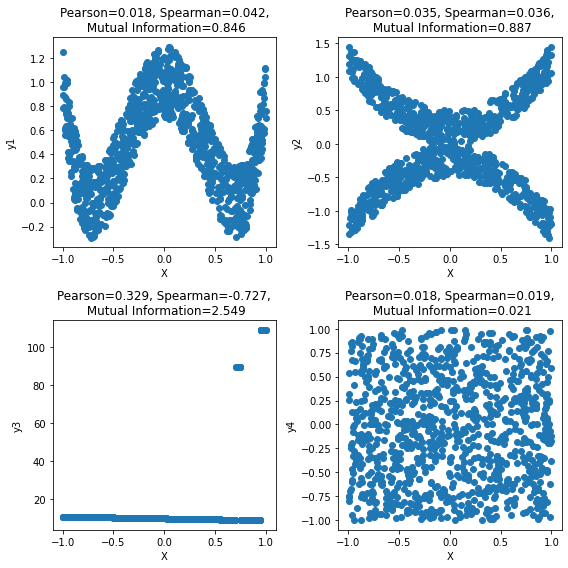

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(8,8))
axs = axs.flatten()
for i, ax in enumerate(axs):
    X, y = np.array(data['X']), data['y' + str(i+1)]
    ax.scatter(X, y)
    p = format(pearson(X,y), '.3f')
    s = format(spearman(X,y), '.3f')
    mi = format(float(mutual_info_regression(X.reshape(-1,1),y)), '.3f')
    ax.set_title(f'Pearson={p}, Spearman={s},\n Mutual Information={mi}')
    ax.set_xlabel('X')
    ax.set_ylabel('y' + str(i+1))
fig.tight_layout()
fig.show()
    

(6) Begründen Sie nun für jedes Datenreihenpaar, warum Sie Korrelationen oder keine Korrelation durch Pearson, Spearman und die Mutual Information angezeigt bekommen.

* Begründen Sie zusätzlich, warum Sie für Datenreihenpaar $(X, y_3)$ so unterschiedliche Ergebnisse für den Pearson- und den Spearman-Korrelationskoeffizienten erhalten haben.

Für $y_1, y_2, y_4$ ist deutlich zu segen, dass kein linearer und kein monotoner Zusammenhang zu erkennen ist, deswegen sind hier auch die pearson und spearman Korrelationkoeffizienten sehr niedrig. Für $y_1$ und $y_2$ sind jedoch Zusammenhänge zu erkennen, einmal eine Funktion in W Form und einmal eine Art gespiegelte Parabel. Deswegen ist auch hier die Mutual Information höher. Für $y_4$ ist gar kein Zusammenhang zu sehen, im Gegenteil es sieht wie eine Gleichverteilung aus, weswegen auch hier die Mutual Information gering ist.

$y_3$ ist hier am interessantesten. Alle drei erkennen einen Zusammenhang, es ist auch eindeutig einer zu sehen. 
Der spearman Korrelationkoeffizient erkennt den fallenden Zusammenhang der annähernden Geraden im unteren Bereichs des Graphen. Da der Spearman Korrelationskoeffizient ausschließlich von der Anzahl der Datenpunkt abhäng ist er nicht sensitiv für Ausreißer. Diese beinflussen ihn kaum, da die wenigen Punkte kaum eine Rolle spielen. Der Pearson Korrelationkoeffizient ist jedoch sehr sensitiv gegenüber von Ausreißern, weswegen er auf die Ausreißer auch in $y_3$ auch schlecht reagiert und einen leichten positiven linearen Zusammenhang suggeriert, obwohl dieser ausschließlich durch die Ausreißer entsteht.